# Exploring Relationships

## Contents

## 1. Importing Visualization Libraries and Data
## 2. Data cleaning checks
## 2. Exploring Relationships
     Correlations
### 2.1 Correlation matrix heatmap (colored)
### 2.2 Scatterplots for the variables with the strongest correlation
### 2.3 Pair Plots
### 2.4 Categorical Plot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path

path = r'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'
path

'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'

In [3]:
df_mm = pd.read_pickle(os.path.join(path, 'Data', 'prepared data', 'prep_mm_data.pkl'))
df_mm.head()

,main_ID,incident_ID,inc_type,region_inc,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,...,latitude,longitude,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,UNSD_geo_group,source_quality
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,1,2014,1.0,1.0,0.0,...,31.650259,-110.366453,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5.0
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,1,2014,1.0,1.0,0.0,...,31.597130,-111.737560,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5.0
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,1,2014,1.0,1.0,0.0,...,31.940260,-113.011250,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5.0
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,1,2014,1.0,1.0,0.0,...,31.506777,-109.315632,Central America,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",Northern America,5.0
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,1,2014,1.0,3.0,2.0,...,59.155100,28.000000,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),Northern Europe,1.0


In [4]:
df_mm.shape

(13493, 22)

## 2. Data cleaning checks

### Check summaries

In [5]:
# Check inconsistencies
df_mm.describe()

,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,latitude,longitude,source_quality
count,13493,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000
mean,2019-09-17 14:34:35.209368064,6.684355,2019.197510,4.389461,10.878826,6.489365,1.813829,2.575632,27.144641,-17.913633,3.264063
min,2014-01-02 00:00:00,1.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,-87.000000,-37.462916,-144.774250,1.000000
25%,2017-10-08 00:00:00,4.000000,2017.000000,1.000000,1.000000,0.000000,1.000000,0.000000,22.056701,-98.454803,2.000000
50%,2019-10-05 00:00:00,7.000000,2019.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.719405,11.140718,4.000000
75%,2021-11-30 00:00:00,9.000000,2021.000000,2.000000,3.000000,0.000000,1.000000,1.000000,33.071990,27.311734,4.000000
max,2023-10-17 00:00:00,12.000000,2023.000000,1022.000000,1952.000000,1950.000000,250.000000,1022.000000,66.929981,138.086033,5.000000
std,NaN,3.340813,2.482202,19.662386,48.698793,41.738181,5.952016,18.163062,11.370606,65.371556,1.371919


In [6]:
df_mm.describe(include= object)

,main_ID,incident_ID,inc_type,region_inc,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,UNSD_geo_group
count,13493,13493,13493,13493,13493,13493,13493,13493,13493,13493,13493
unique,13493,13493,4,16,34,15,345,26,7769,3958,19
top,2014.MMP00001,2014.MMP00001,Incident,North America,Latin America / Caribbean (P),Drowning,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America
freq,1,1,13126,2849,2259,3409,7415,3581,1061,1574,2852


In [7]:
# Check inconsistencies
df_mm.dtypes

main_ID                        object
incident_ID                    object
inc_type                       object
region_inc                     object
website_date_new       datetime64[ns]
month_num                       int64
year                            int64
tot_dead_miss                 float64
tot_migrants                  float64
tot_survive                   float64
identified_demogr             float64
unidentified_demogr           float64
latitude                      float64
longitude                     float64
reg_origin                     object
cause_death                    object
country_origin                 object
migration_route                object
loc_death                      object
info_source                    object
UNSD_geo_group                 object
source_quality                float64
dtype: object

In [8]:
# Change float64 to integer where appropriate
columns_to_convert = ['tot_dead_miss', 'tot_migrants', 'tot_survive', 'identified_demogr', 'unidentified_demogr', 'source_quality']

# Change the data type of multiple columns to integer
df_mm[columns_to_convert] = df_mm[columns_to_convert].astype(int)

df_mm.dtypes

main_ID                        object
incident_ID                    object
inc_type                       object
region_inc                     object
website_date_new       datetime64[ns]
month_num                       int64
year                            int64
tot_dead_miss                   int64
tot_migrants                    int64
tot_survive                     int64
identified_demogr               int64
unidentified_demogr             int64
latitude                      float64
longitude                     float64
reg_origin                     object
cause_death                    object
country_origin                 object
migration_route                object
loc_death                      object
info_source                    object
UNSD_geo_group                 object
source_quality                  int64
dtype: object

In [9]:
# Check missings
df_mm.isnull().sum()

main_ID                0
incident_ID            0
inc_type               0
region_inc             0
website_date_new       0
month_num              0
year                   0
tot_dead_miss          0
tot_migrants           0
tot_survive            0
identified_demogr      0
unidentified_demogr    0
latitude               0
longitude              0
reg_origin             0
cause_death            0
country_origin         0
migration_route        0
loc_death              0
info_source            0
UNSD_geo_group         0
source_quality         0
dtype: int64

In [10]:
# Check duplicates
df_dups = df_mm[df_mm.duplicated()]
df_dups

,main_ID,incident_ID,inc_type,region_inc,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,...,latitude,longitude,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,UNSD_geo_group,source_quality


In [11]:
# Check mixed-type columns
for col in df_mm.columns.tolist():
      weird = (df_mm[[col]].applymap(type) != df_mm[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_mm[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

### There are no inconsistencies in data types or summary stats. There are no blanks and no duplicates. There are no mixed-type columns.

### Create subsamples to exclude columns that are irrelevant for data exploration or sketchy.

In [12]:
df_mm.columns

Index(['main_ID', 'incident_ID', 'inc_type', 'region_inc', 'website_date_new',
       'month_num', 'year', 'tot_dead_miss', 'tot_migrants', 'tot_survive',
       'identified_demogr', 'unidentified_demogr', 'latitude', 'longitude',
       'reg_origin', 'cause_death', 'country_origin', 'migration_route',
       'loc_death', 'info_source', 'UNSD_geo_group', 'source_quality'],
      dtype='object')

### For a better use of the incident type variable, transform to scale:
'Incident' = 1 'Cumulative Incident' = 2 'Split Incident' = 2 'Incident,Split Incident' = 2

In [13]:
# Define a function to map the incident types
def map_incident_type(inc_type):
    if inc_type == 'Incident':
        return 1
    elif inc_type in ('Cumulative Incident', 'Split Incident', 'Incident,Split Incident'):
        return 2
    else:
        return 0  # For any other values, you can set it to 0 or handle it as needed

# Create a new column 'Incident Type numeric' with the transformed values
df_mm = df_mm.assign(inc_type_num=df_mm['inc_type'].apply(map_incident_type))

In [14]:
# Count the unique values and their occurrences using value_counts
unique_counts = df_mm['inc_type_num'].value_counts().sort_index()

# Print the results
for inc_number, count in unique_counts.items():
    print(f"Incident Type {inc_number}: {count} occurrences")

Incident Type 1: 13126 occurrences
Incident Type 2: 367 occurrences


In [15]:
# Check

# Count the unique values and their occurrences using value_counts
unique_counts = df_mm['inc_type'].value_counts().sort_index()

# Print the results
for inc_number, count in unique_counts.items():
    print(f"Incident Type {inc_number}: {count} occurrences")

Incident Type Cumulative Incident: 85 occurrences
Incident Type Incident: 13126 occurrences
Incident Type Incident,Split Incident: 5 occurrences
Incident Type Split Incident: 277 occurrences


In [16]:
# Create a subset excluding potentially problematic columns

sub = df_mm[['inc_type', 'region_inc', 'website_date_new',
       'month_num', 'year', 'tot_dead_miss', 'tot_migrants', 'tot_survive',
       'identified_demogr', 'unidentified_demogr', 'latitude', 'longitude',
       'reg_origin', 'cause_death', 'country_origin', 'migration_route',
       'UNSD_geo_group', 'source_quality', 'inc_type_num']]

pd.options.display.max_columns = None
sub.head(5)

,inc_type,region_inc,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,latitude,longitude,reg_origin,cause_death,country_origin,migration_route,UNSD_geo_group,source_quality,inc_type_num
0,Incident,North America,2014-01-06,1,2014,1,1,0,1,0,31.650259,-110.366453,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Northern America,5,1
1,Incident,North America,2014-01-12,1,2014,1,1,0,0,1,31.597130,-111.737560,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Northern America,5,1
2,Incident,North America,2014-01-14,1,2014,1,1,0,0,1,31.940260,-113.011250,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Northern America,5,1
3,Incident,North America,2014-01-16,1,2014,1,1,0,1,0,31.506777,-109.315632,Central America,Violence,Mexico,US-Mexico border crossing,Northern America,5,1
4,Incident,Europe,2014-01-16,1,2014,1,3,2,1,0,59.155100,28.000000,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,Unknown,Northern Europe,1,1


In [17]:
# Create a subset of numeric colums

sub_2 = df_mm[['website_date_new',
       'month_num', 'year', 'tot_dead_miss', 'tot_migrants', 'tot_survive',
       'identified_demogr', 'unidentified_demogr', 'latitude', 'longitude',
        'source_quality', 'inc_type_num']]
      
pd.options.display.max_columns = None
sub_2.head(5)

,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,latitude,longitude,source_quality,inc_type_num
0,2014-01-06,1,2014,1,1,0,1,0,31.650259,-110.366453,5,1
1,2014-01-12,1,2014,1,1,0,0,1,31.597130,-111.737560,5,1
2,2014-01-14,1,2014,1,1,0,0,1,31.940260,-113.011250,5,1
3,2014-01-16,1,2014,1,1,0,1,0,31.506777,-109.315632,5,1
4,2014-01-16,1,2014,1,3,2,1,0,59.155100,28.000000,1,1


## 3. Exploring Relationships: Visualizations

### Correlations

In [18]:
sub_2.head()

,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,latitude,longitude,source_quality,inc_type_num
0,2014-01-06,1,2014,1,1,0,1,0,31.650259,-110.366453,5,1
1,2014-01-12,1,2014,1,1,0,0,1,31.597130,-111.737560,5,1
2,2014-01-14,1,2014,1,1,0,0,1,31.940260,-113.011250,5,1
3,2014-01-16,1,2014,1,1,0,1,0,31.506777,-109.315632,5,1
4,2014-01-16,1,2014,1,3,2,1,0,59.155100,28.000000,1,1


In [19]:
# Create a new correlation matrix using pandas

sub_2.corr()

,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,latitude,longitude,source_quality,inc_type_num
website_date_new,1.000000,0.011114,0.993656,-0.076331,-0.070253,-0.046010,0.002094,-0.083318,0.083907,0.002059,0.235993,0.026314
month_num,0.011114,1.000000,-0.100925,-0.000606,-0.008998,-0.010212,0.029462,-0.010311,0.005294,0.061079,-0.016743,0.009662
year,0.993656,-0.100925,1.000000,-0.075978,-0.068894,-0.044591,-0.001309,-0.081821,0.082722,-0.004839,0.236613,0.024875
tot_dead_miss,-0.076331,-0.000606,-0.075978,1.000000,0.530585,0.147981,0.393653,0.953548,0.016019,0.080216,0.040622,0.157763
tot_migrants,-0.070253,-0.008998,-0.068894,0.530585,1.000000,0.916816,0.211532,0.505065,0.042289,0.093549,0.040891,0.146036
tot_survive,-0.046010,-0.010212,-0.044591,0.147981,0.916816,1.000000,0.061363,0.140088,0.041795,0.071361,0.028574,0.096070
identified_demogr,0.002094,0.029462,-0.001309,0.393653,0.211532,0.061363,1.000000,0.098449,-0.001195,0.068696,0.047747,0.142487
unidentified_demogr,-0.083318,-0.010311,-0.081821,0.953548,0.505065,0.140088,0.098449,1.000000,0.017732,0.064326,0.028329,0.124093
latitude,0.083907,0.005294,0.082722,0.016019,0.042289,0.041795,-0.001195,0.017732,1.000000,-0.031507,0.357109,0.029037
longitude,0.002059,0.061079,-0.004839,0.080216,0.093549,0.071361,0.068696,0.064326,-0.031507,1.000000,-0.170535,-0.004437


### 2.1 Correlation matrix heatmap (colored)

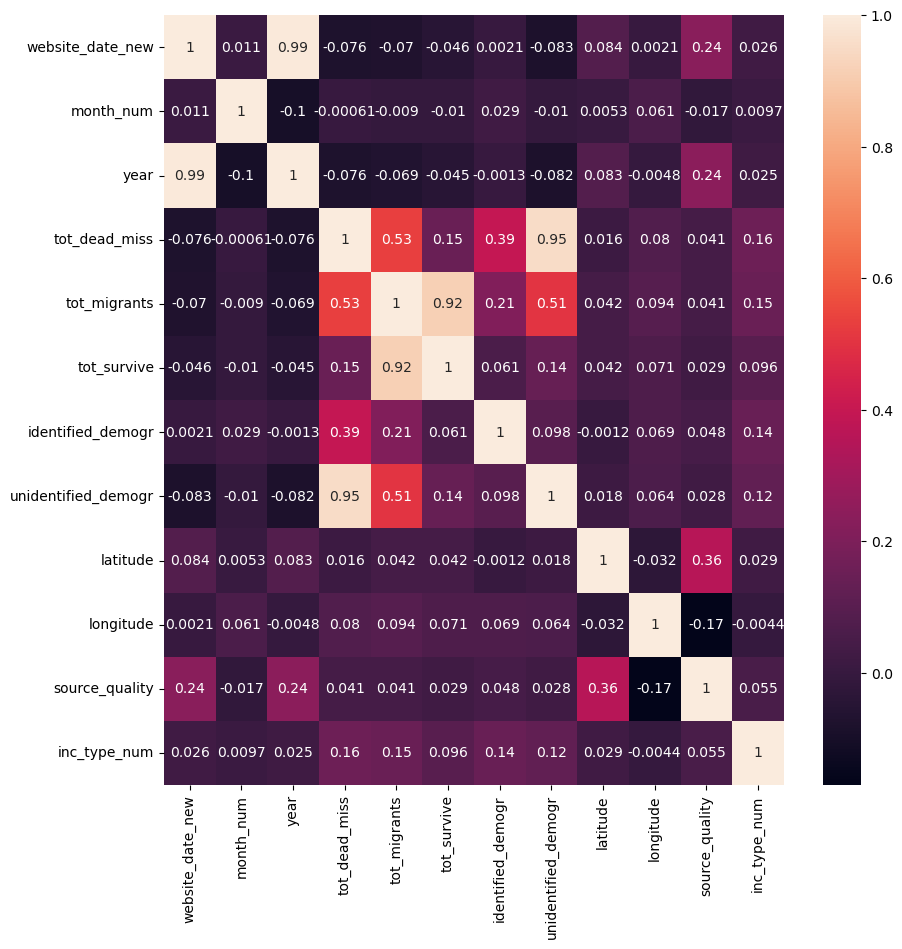

In [20]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Interpretation: 

The source quality is weakly positively correlated to website date and year, meaning that the more recently the indicident happended, the better the source quality/ amount of coverage might be.

If source quality is higher, more migrant demographics are identified. 

The higher the number of overall dead/missing per incident, the more are unidentified.

The early the incident happended, the higher the number of survivors (weak relationship). 

No indication of seasonality: no trend regarding months and incidents. 

### 2.2 Scatterplots for the variables with the strongest correlation

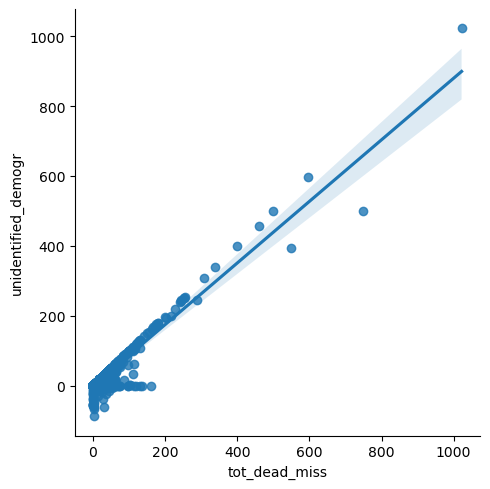

In [21]:
# Create a scatterplot for the "tot_dead_missing" and "unidentified_demographics" columns in seaborn

sns.lmplot(x = 'tot_dead_miss', y = 'unidentified_demogr', data = sub_2)

#### Strong linear relation: the more migrants die or go missing per incident, the more are unidentified in terms of demographics.

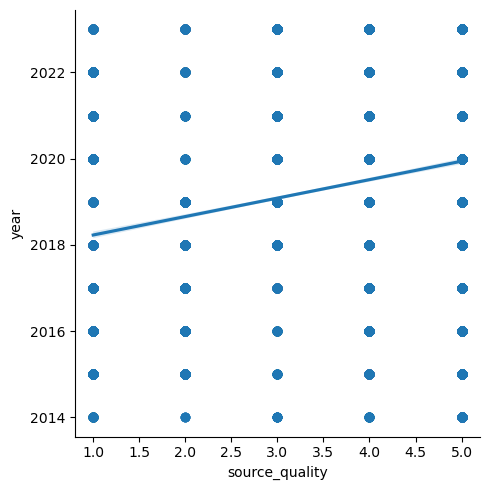

In [22]:
# Create a scatterplot for the "source_quality" and "year" columns in seaborn

sns.lmplot(x = 'source_quality', y = 'year', data = sub_2)

#### Weak linear tendency for increasing source quality with each year.

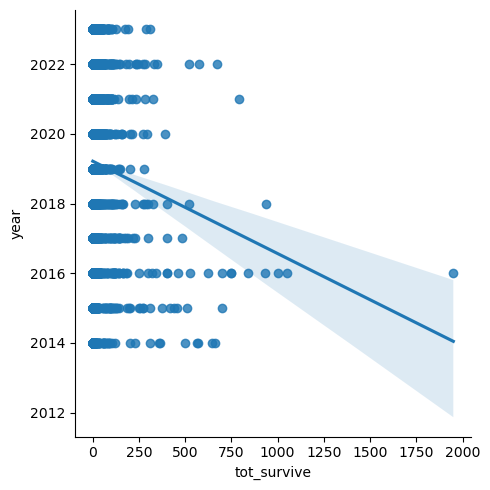

In [23]:
# Create a scatterplot for the "tot_survive" and "year" columns in seaborn

sns.lmplot(x = 'tot_survive', y = 'year', data = sub_2)

#### With every year, the number of registered survivors per incident is smaller.

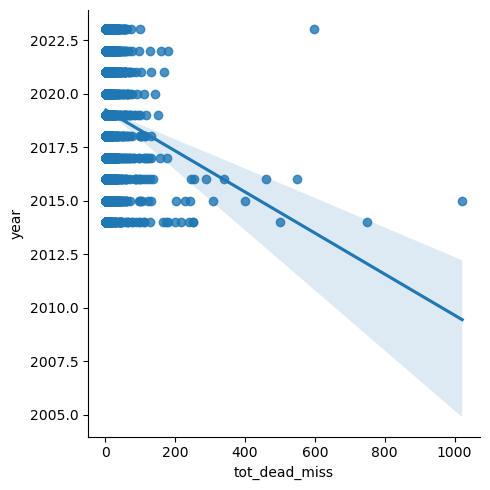

In [24]:
# Create a scatterplot for the "tot_dead_missing" and "year" columns in seaborn

sns.lmplot(x = 'tot_dead_miss', y = 'year', data = sub_2)

#### With every year, the number of overall deaths and missings per incident is smaller.

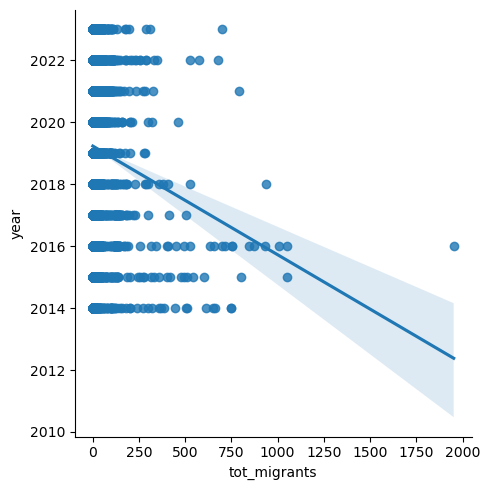

In [25]:
# Create a scatterplot for the "tot_migrants" and "year" columns in seaborn

sns.lmplot(x = 'tot_migrants', y = 'year', data = sub_2)

#### With every year, the number of overall registered migrants (dead and survived) per incident is smaller. BUT: These might all be due to outliers at early years of registration

### 2.3 Pair plots

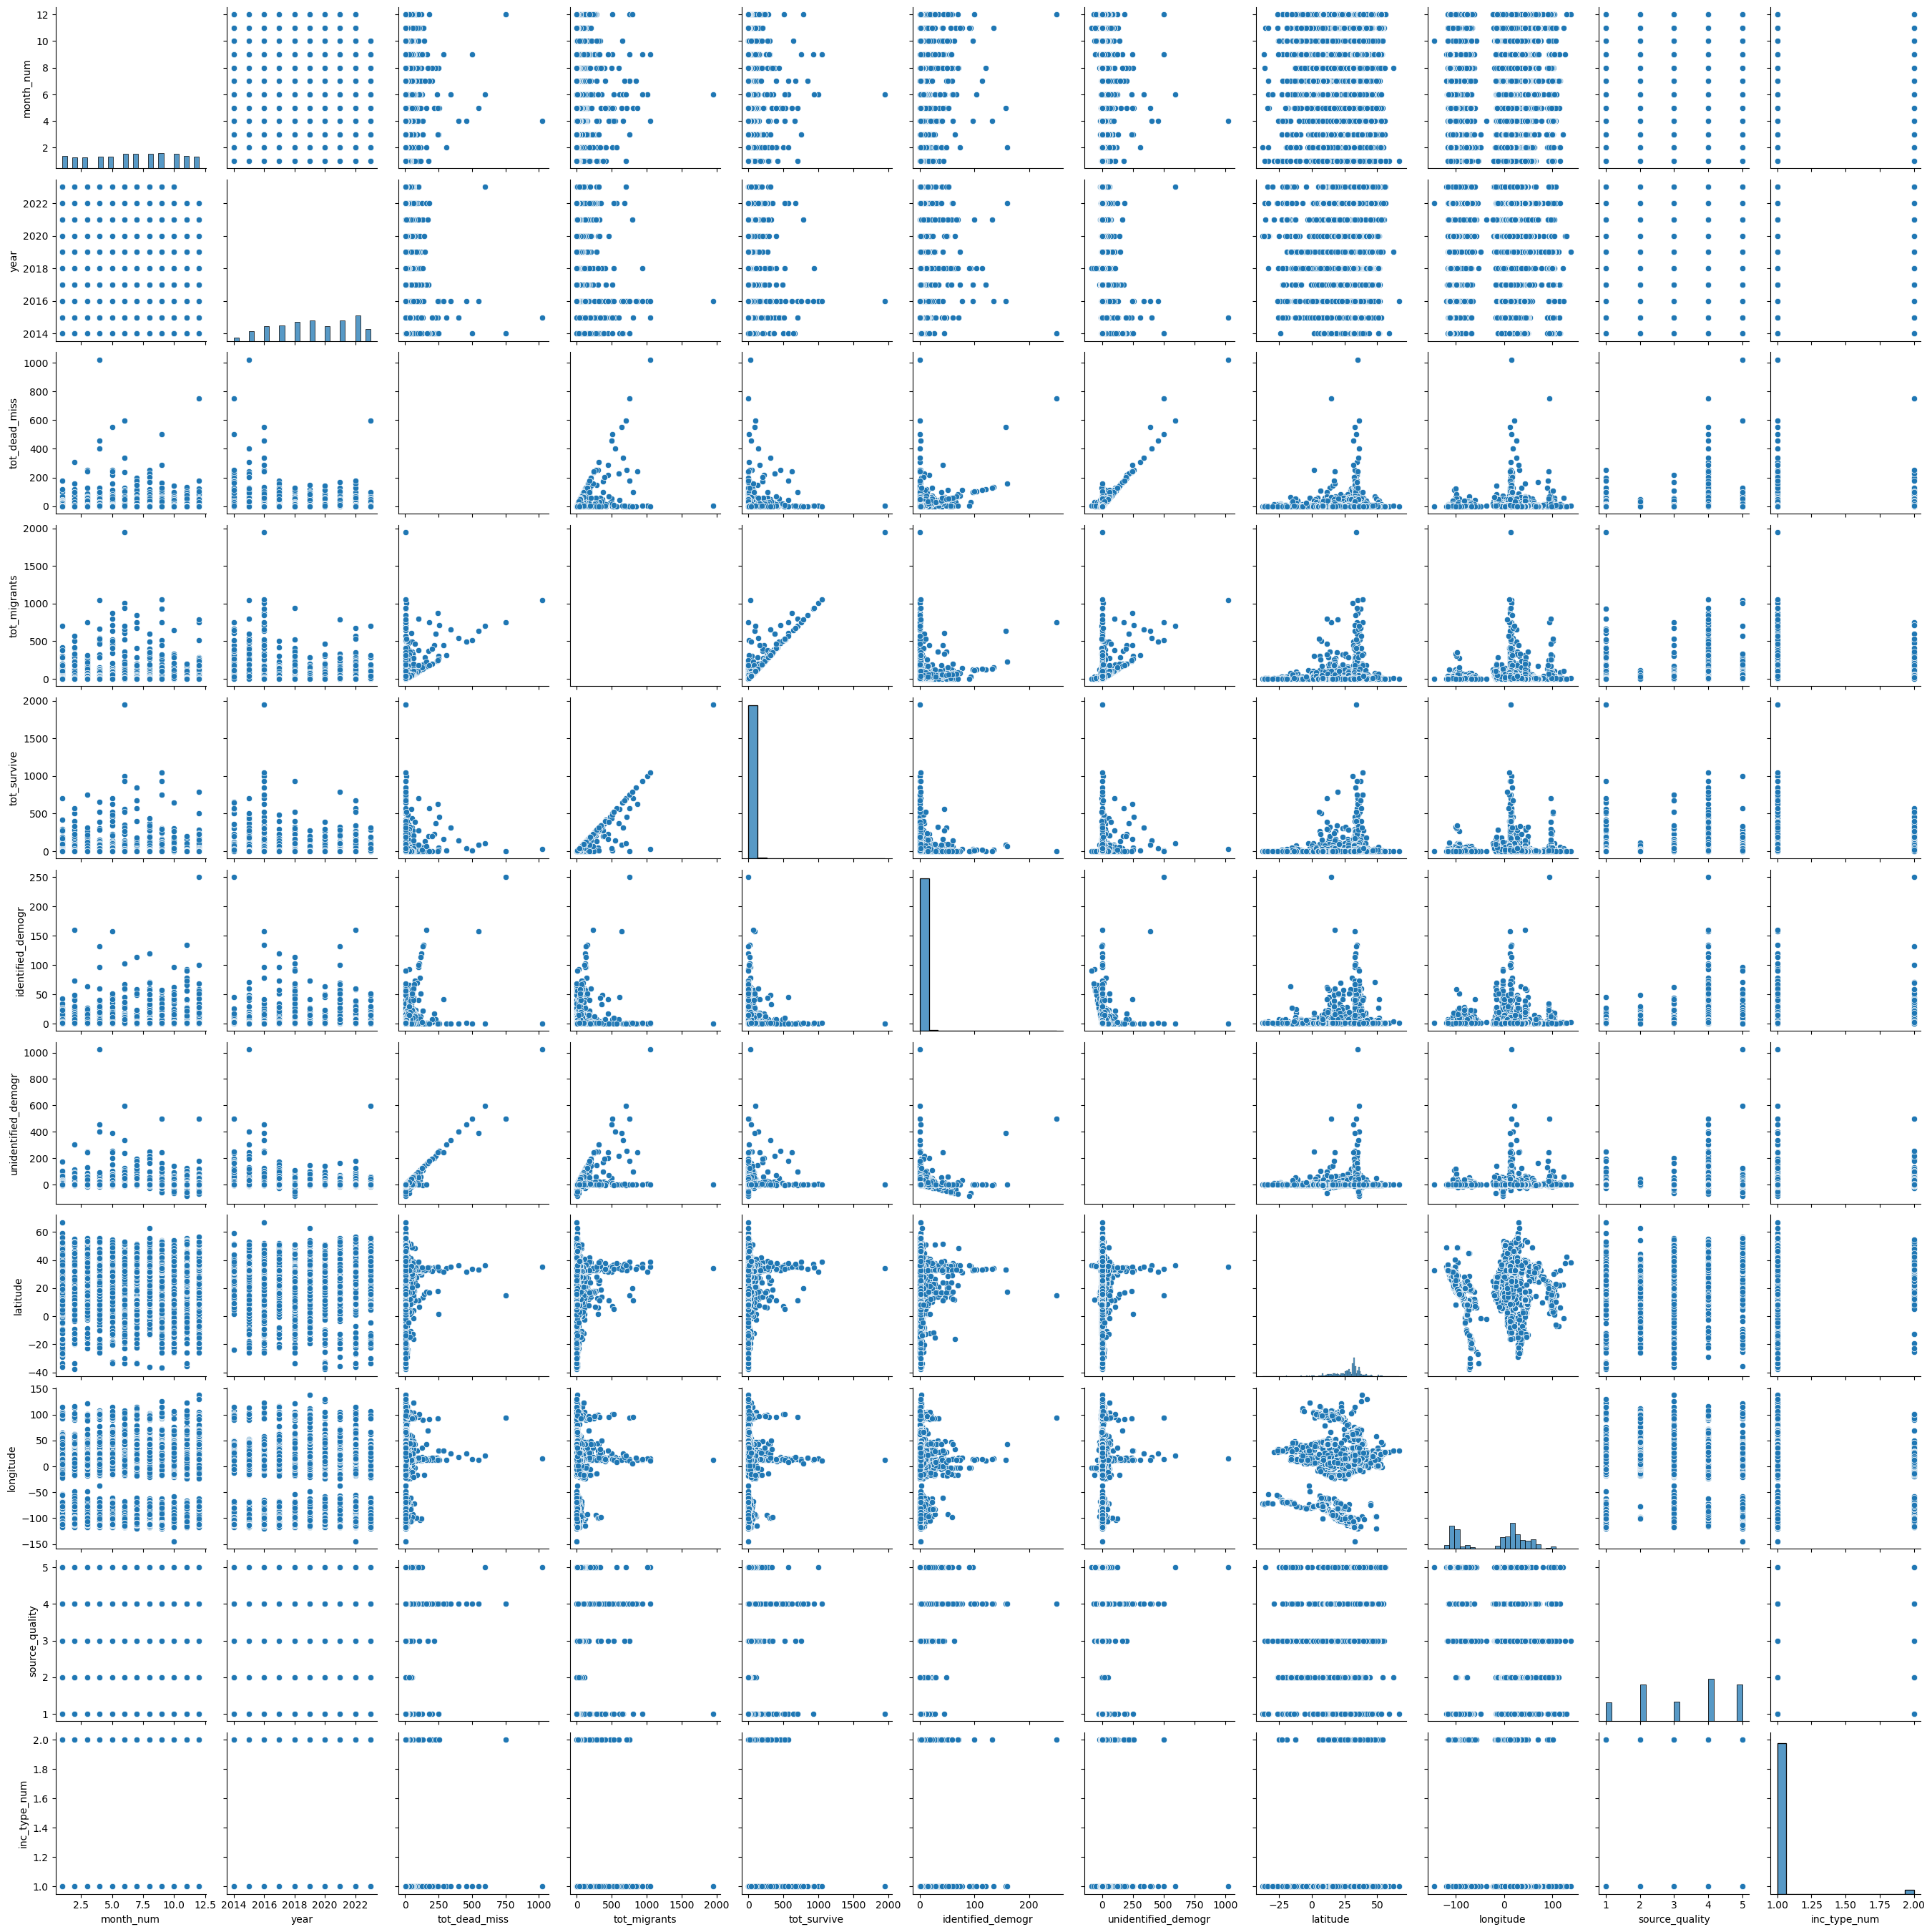

In [26]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### Interesting: There seem to be tendencies of more outliers of overall deaths & missings within summer months. I want to check this further, to explore seasonality.

### There are patterns in latitude and longitude regarding overall deaths & missings, indicating highly frequented and deadly routes.

### 2.4 Categorical Plot

<Axes: xlabel='tot_dead_miss', ylabel='Count'>

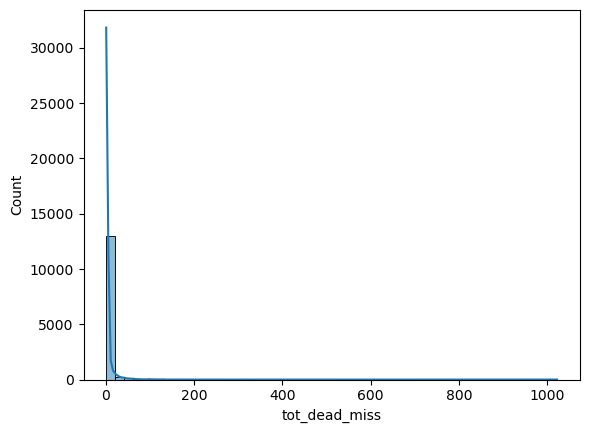

In [27]:
# Use a histogram to visualize the distribution of the variables. 

# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_mm['tot_dead_miss'], bins = 50, kde = True)

In [28]:
df_mm.loc[df_mm['tot_dead_miss'] < 5, 'Victims per incidents'] = '1-4'

In [29]:
df_mm.loc[(df_mm['tot_dead_miss'] >= 5) & (df_mm['tot_dead_miss'] < 11), 'Victims per incidents'] = '5-10'

In [30]:
df_mm.loc[(df_mm['tot_dead_miss'] >= 11) & (df_mm['tot_dead_miss'] < 21), 'Victims per incidents'] = '11-20'

In [31]:
df_mm.loc[(df_mm['tot_dead_miss'] >= 21) & (df_mm['tot_dead_miss'] < 41), 'Victims per incidents'] = '21-40'

In [32]:
df_mm.loc[(df_mm['tot_dead_miss'] >= 41) & (df_mm['tot_dead_miss'] < 101), 'Victims per incidents'] = '41-100'

In [33]:
df_mm.loc[(df_mm['tot_dead_miss'] >= 101) & (df_mm['tot_dead_miss'] < 201), 'Victims per incidents'] = '101-200'

In [34]:
df_mm.loc[(df_mm['tot_dead_miss'] >= 201) & (df_mm['tot_dead_miss'] < 501), 'Victims per incidents'] = '201-500'

In [35]:
df_mm.loc[df_mm['tot_dead_miss'] >= 501,  'Victims per incidents'] = '>500'

In [36]:
df_mm['Victims per incidents'].value_counts(dropna = False)

Victims per incidents
1-4        11659
5-10         866
11-20        451
21-40        280
41-100       180
101-200       38
201-500       15
>500           4
Name: count, dtype: int64

In [30]:
df_mm = df_mm.rename(columns={'Victims per incidents': 'vict_per_incidents'})
df_mm.columns

Index(['main_ID', 'incident_ID', 'inc_type', 'region_inc', 'website_date_new',
       'month_num', 'year', 'tot_dead_miss', 'tot_migrants', 'tot_survive',
       'identified_demogr', 'unidentified_demogr', 'latitude', 'longitude',
       'reg_origin', 'cause_death', 'country_origin', 'migration_route',
       'loc_death', 'info_source', 'UNSD_geo_group', 'source_quality',
       'inc_type_num', 'vict_per_incidents'],
      dtype='object')

### Create categorical plots in seaborn using the "victims per incidents" categories created above

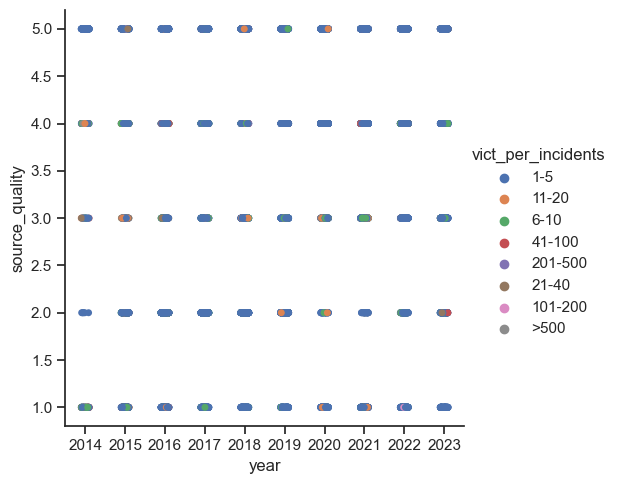

In [38]:
# Create a categorical plot in seaborn 

sns.set(style="ticks")
g = sns.catplot(x="year", y="source_quality", hue="vict_per_incidents", data=df_mm)

#### No clear trend/ pattern.

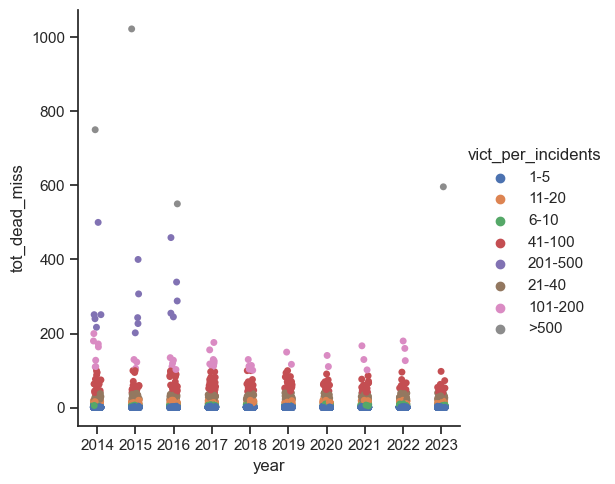

In [39]:
# Create categorical plot

sns.set(style="ticks")
g = sns.catplot(x="year", y="tot_dead_miss", hue="vict_per_incidents", data=df_mm)

#### 2014, 2015, 2016, and 2023 have most outliers in numbers of victimes at once incident. In 2015, a really tragic event has happened with an extremly high number of victims.

### Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

Is the count of deaths related to months, is there "seasonality"?
--> No strong indication, however, this should be explored further.



Where are the "hotspots" of migration deaths?
--> Yes, there are remarkable patters around certain latitudes/longitudes.

How many migrants can be identified in terms of demographics?
--> the minority.

Are places with high coverage also the ones who record most deaths?
--> Tragic events with more victims are better covered. 

Further questions:

Higher numbers of deaths/ missings seems to be better covered (better source quality). Is this related to the location of incident? What confounding variables may account for this?

Who has the highest risk of dying and of these deaths to be covered by media?

Is the trend of less deads and missings per year stable when excluding outliers from early years?

### Define any hypotheses that you can at this point. You’ll be testing these later on.

If numbers of deaths and missings increase, then the source quality is better.

In [31]:
# Export data to pkl
sub_2.to_pickle(os.path.join(path, 'Data', 'prepared data', 'sub_numeric.pkl'))
df_mm.to_pickle(os.path.join(path, 'Data', 'prepared data', 'df_mm.pkl'))